# Prepaid phone analysis project in Megaline

# Content <a id='back'></a>

* [Introduction](#intro)
* [1. Initialisation](#ini)
* [2. Upload Data](#uploaddata)
* [3. Exploratory Data Analysis](#eda)
  * [3.1 Conclusion and Following Steps](#stat)
* [4. Data Preprocesing](#preprocesing)
  * [4.1 Fixing Plan Dataset](#fix1)
  * [4.2 Enhancing Plan Dataset](#en1)
  * [4.3 Fixing Users Dataset](#fix2)
  * [4.4 Enhancing Users Dataset](#en2)
  * [4.5 Fixing dsa Dataset](#fix3)
  * [4.6 Enhancing Users Dataset](#en3)
  * [4.7 Fixing dsa Dataset](#fix4)
  * [4.8 Enhancing Usads Dataset](#en4)
  * [4.9 Fixing dsa Dataset](#fix5)
  * [4.10 Enhancing Us Dataset](#en5)
* [5. Unifying in one Single Dataset](#uni)
* [6. Studying users behaviour](#behaviour)
* [7. Testing statistical hypotheses](#hypotheses)
* [Final Conclusions](#end)

## Introduction <a id='intro'></a>

# ¿Which is the Best Phone Plan?

Working as an analyst for the telecommunications operator Megaline, this project focuses on two prepaid plans offered to customers: Surf and Ultimate. The commercial department aims to identify which of these plans generates more revenue in order to adjust the advertising budget accordingly. 

A preliminary analysis of these plans will be carried out based on a relatively small sample of 500 Megaline customers. The dataset includes information on who the customers are, their locations, the plan they use, and the number of calls made and text messages sent in 2018. The goal is to analyze customer behavior and determine which prepaid plan yields the highest revenue.

**PURPOSE:**

The purpose of this project is to analyze customer data from the telecommunications operator Megaline, which offers two prepaid plans: Surf and Ultimate. The dataset includes information on calls, messages, and internet traffic volume used throughout the months of 2018, allowing for an examination of monthly rates by plan and city, among other factors, to determine which plan generates more revenue for the company.

The analysis will involve reviewing the variables present in these datasets and performing data preprocessing to ensure the data is as complete as possible without significantly altering its values. Following this, graphical methods such as histograms, boxplots, and other visualizations will be employed to deepen the analysis, and statistical hypothesis testing will be conducted to confirm the findings.

## 1. Initialisation <a id='ini'></a>

In [1]:
# Loading the libraries
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


## 2. Upload Data <a id='uploaddata'></a>

In [2]:
# Uploading all the datasets 
try: 
    calls = pd.read_csv('megaline_calls.csv')
    internet = pd.read_csv('megaline_internet.csv')
    messages = pd.read_csv('megaline_messages.csv')
    plans = pd.read_csv('megaline_plans.csv')
    users = pd.read_csv('megaline_users.csv')
except:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')

## 3. Exploratory Data Analysis (EDA) <a id='eda'><a>

## Preparing the Datasets

Next, we will proceed to load the various tables provided with user information, calls, messages, internet, and plans to review them. Subsequently, we will correct and enrich the data if necessary.

### Plans Dataset

The dataset 'plans" contains the following fields: 

- `plan_name`: name of the plan.

- `usd_monthly_fee`: monthly fee in US dollars.

- `minutes_included`: minutes included per month.

- `messages_included`: SMS included per month.

- `mb_per_month_included`: data included per month (in megabytes).

- `usd_per_minute`: price per minute after exceeding the package limits (for example, if the package includes 100 minutes, the operator will charge for the 101st minute).

- `usd_per_message`: price per SMS after exceeding the package limits.

- `usd_per_gb`: price per gigabyte of additional data after exceeding the package limits (1 GB = 1024 megabytes).

In [5]:
plans # Loading the dataset "plans"

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Users Dataset

The dataset "users" contains the following fields:

- `user_id`: unique user identifier.

- `first_name`: user’s first name.

- `last_name`: user’s last name.

- `age`: user’s age (in years).

- `reg_date`: subscription date (dd, mm, yy).

- `churn_date`: the date when the user stopped using the service (if the value is missing, the plan was active when the database was extracted).

- `city`: user’s city of residence.

- `plan`: name of the plan.


In [12]:
users # Loading the data file into "user" DataFrame

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


### Calls Dataset

The dataset "calls" contains the following fields:

- `id`: unique identifier of the call.

- `call_date`: date of the call.

- `duration`: duration of the call (in minutes).

- `user_id`: identifier of the user making the call.

In [11]:
calls # Loading the data file into "calls" DataFrame

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


## Message Dataset

The dataset "messages" contains the following fields:

- `id`: unique identifier of the SMS.

- `message_date`: date of the SMS.

- `user_id`: identifier of the user who sent the SMS.

In [10]:
messages # Loading the data file into "messages" DataFrame

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


## Internet Dataset

The dataset "internet" contains the following fields:

- `id`: unique identifier of the session.

- `mb_used`: volume of data used during the session (in megabytes).

- `session_date`: date of the web session.

-  `user_id`: identifier of the user.









In [7]:
internet #Loading the data file into a DataFrame internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


We explored each of the tables in the exercise. Subsequently, we will analyse them one by one.

## Plans

In [13]:
# Printing general information for the plans
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 192.0+ bytes


It can be seen that the plans do not have missing values, and there are no inappropriate data entries. The values for MB, minutes, and USD will be converted to float as they are continuous variables. Additionally, the monthly MB usage will be rounded up, so for example, 1025 MB would be considered as 2 GB.

## 4. Data Preprocesing <a id='preprocesing'></a>

### 4.1 Fixing Plan Dataset <a id='fix1'></a>

Procceding to correct the variables, data from the 'plans' table.

In [15]:
plans['mb_per_month_included'] = plans['mb_per_month_included'].astype(float)

In [16]:
plans['minutes_included'] = plans['minutes_included'].astype(float)

In [17]:
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype(float)

In [18]:
plans['usd_per_gb'] = plans['usd_per_gb'].astype(float)

### 4.2 Enhancing Plan Dataset <a id='en1'></a>

Adding additional factors such as columns or data transformation.

In [19]:
# Define a function to round up
def round_up_to_gigabytes(mb_per_month_included):
    gigabytes = np.ceil(mb_per_month_included / 1024)  # Dividir por 1024 para convertir de MB a GB
    return gigabytes

# Applying the function to the 'mb_per_month_included' column and create a new column 'gigabytes'
plans['gb_per_month_included'] = plans['mb_per_month_included'].apply(round_up_to_gigabytes)

In [21]:
plans.info() #verifying changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      float64
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(7), int64(1), object(1)
memory usage: 208.0+ bytes


### 4.3 Fixing Users Dataset <a id='fix2'></a>

In [22]:
# Printing the general information/summary about the users' DataFrame.
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 19.6+ KB


In [23]:
users.describe() 

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [24]:
# Printing a data sample of the users
users[users['churn_date'].notnull()].head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07


In [25]:
users['user_id'].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
       1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1143, 1144, 1145, 1146, 1147, 1148, 1149, 11

In [27]:
users['churn_date'].sort_values().unique()

array(['2018-07-31', '2018-08-16', '2018-08-19', '2018-09-01',
       '2018-09-07', '2018-09-17', '2018-09-18', '2018-10-03',
       '2018-10-07', '2018-10-13', '2018-10-22', '2018-11-11',
       '2018-11-14', '2018-11-16', '2018-11-18', '2018-11-21',
       '2018-11-24', '2018-11-29', '2018-11-30', '2018-12-10',
       '2018-12-12', '2018-12-15', '2018-12-18', '2018-12-19',
       '2018-12-22', '2018-12-26', '2018-12-27', '2018-12-30',
       '2018-12-31', nan], dtype=object)

In [28]:
users['plan'].unique()

array(['ultimate', 'surf'], dtype=object)

In [29]:
users['city'].sort_values().unique()

array(['Albany-Schenectady-Troy, NY MSA', 'Albuquerque, NM MSA',
       'Atlanta-Sandy Springs-Roswell, GA MSA',
       'Austin-Round Rock-Georgetown, TX MSA', 'Bakersfield, CA MSA',
       'Baltimore-Columbia-Towson, MD MSA', 'Baton Rouge, LA MSA',
       'Birmingham-Hoover, AL MSA', 'Boston-Cambridge-Newton, MA-NH MSA',
       'Bridgeport-Stamford-Norwalk, CT MSA',
       'Buffalo-Cheektowaga, NY MSA', 'Cape Coral-Fort Myers, FL MSA',
       'Charleston-North Charleston, SC MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'Cincinnati, OH-KY-IN MSA', 'Cleveland-Elyria, OH MSA',
       'Colorado Springs, CO MSA', 'Columbia, SC MSA', 'Columbus, OH MSA',
       'Dallas-Fort Worth-Arlington, TX MSA', 'Dayton-Kettering, OH MSA',
       'Denver-Aurora-Lakewood, CO MSA',
       'Detroit-Warren-Dearborn, MI MSA', 'El Paso, TX MSA',
       'Fresno, CA MSA', 'Grand Rapids-Kentwood, MI MSA',
       'Greensboro-High Point, NC MSA',
    

In [31]:
duplicados_users = users.duplicated()
cantidad_duplicados_users = duplicados_users.sum()
print(cantidad_duplicados_users) # Finally, we check the number of duplicate rows in the 'users' table.

0


It can be seen that there are missing values in the date when the user stopped using the service, and it is indicated that if it is a missing value, it means that the rate was still being used, so another column for 'validity' will be created to differentiate these cases. No anomalies are seen in other types of data such as unstandardised texts or age values or dates that are out of the ordinary. The date variables must be in 'datetime' format. In addition, the months from this table will be extracted for subsequent analysis.

### Fixing data

In [32]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d') #Changing the format to 'datetime'

In [33]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d') #changing the format to 'datetime'

In [34]:
users.info() #verifying the changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 23.5+ KB


### 4.4 Enhancing users Dataset <a id='en2'></a>

In [35]:
#We created a new binary variable to differentiate whether the user continues using the service or not. 
def binary(value):
    if pd.isna(value):
        return 1 #if it is missing value, returns 1.
    else:
        return 0 #Otherwise returns 0.

users['vigencia'] = users['churn_date'].apply(binary)

In [36]:
#We separated the months into a separate column to compare the validity of the plan (lower limit). 
users['month_reg'] = users['reg_date'].dt.month

In [37]:
#We separated the months into a separate column to compare the validity of the plan (upper limit). 

users['month_churn'] = users['churn_date'].dt.month

In [38]:
# We changed the name of the column 'plan' to 'plan_name' to standardise titles with the plans database. 
users = users.rename(columns={'plan': 'plan_name'})

In [39]:
users[pd.notna(users['churn_date'])].head(5) #We check the overdue cases.

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date,vigencia,month_reg,month_churn
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,0,11,12.0
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,0,6,11.0
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,0,4,9.0
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30,0,12,12.0
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07,0,3,10.0


In [40]:
#We added a column that groups the other cities that are not NY and NJ for the purposes of the hypothesis test in chapter 1.15. 
def agrupar_ciudades(ciudad):
    if ciudad != 'New York-Newark-Jersey City, NY-NJ-PA MSA':
        return 'otras regiones'
    else:
        return ciudad

users['regiones'] = users['city'].apply(agrupar_ciudades)

In [41]:
users.info() #verifying the changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   first_name   500 non-null    object        
 2   last_name    500 non-null    object        
 3   age          500 non-null    int64         
 4   city         500 non-null    object        
 5   reg_date     500 non-null    datetime64[ns]
 6   plan_name    500 non-null    object        
 7   churn_date   34 non-null     datetime64[ns]
 8   vigencia     500 non-null    int64         
 9   month_reg    500 non-null    int32         
 10  month_churn  34 non-null     float64       
 11  regiones     500 non-null    object        
dtypes: datetime64[ns](2), float64(1), int32(1), int64(3), object(5)
memory usage: 35.2+ KB


Although the columns 'churn_date' and 'month_churn' technically have missing values, these will be eliminated when we join all the tables and apply the filters.

### 4.5 Fixing Calls Dataset <a id='fix3'></a>

In [42]:
# Printing general information of calls datagframe
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [43]:
# printing the last 5 calls cases of the dataset
calls.tail(5)

,id,user_id,call_date,duration
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86


In [44]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [46]:
duplicados = calls.duplicated()
cantidad_duplicados = duplicados.sum()
print(cantidad_duplicados) # Finally, we check the number of duplicate rows in the 'calls' table.

0


For the case of the 'calls' table, we can see that the variable 'call_date' should be in datetime format. We see that there are no missing values or duplicates. 
On the other hand, we see that there are call duration values equal to 0, meaning we will need to analyse in greater depth how many data points correspond to those values, as they could be anomalies originating from the data or could simply be considered as missed calls. Finally, in the 'duration' column, there are values in minutes with seconds, where according to the business policy, individual calls should be rounded up; this will also be corrected. It should be noted that the exercise requires obtaining the calls per month, so it will be necessary to extract the month.

In [48]:
#We check the proportion of zero values in 'duration' in total.
num_filas = calls.shape[0]
fila_cero = (calls['duration']==0).sum()
prop_cero = fila_cero / num_filas *100 #percentaje of zero values in total
print(prop_cero)

19.482339274694162


In [50]:
print(calls[calls['duration'] != 0]['duration'].mean())

8.37819550770507


In [51]:
print(calls[calls['duration'] != 0]['duration'].median())

7.71


We see that the percentage of '0' values out of the total is 19% and that if we omit these values, the mean and median of 'duration' increase by around 2 minutes. Given the above, since those 2 minutes are not a negligible value in calls, we will consider those zero values as missed calls.

In [53]:
# Fixing calls datetime format
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

### 4.6 Enhancing calls Dataset <a id='en3'></a>

In [54]:
calls['duration_fix'] = np.ceil(calls['duration']) #we round the values up, creating a new column. Example: 4.1 to 5 minutes.

In [55]:
#We separated the months into a separate column to be able to calculate the calls and minutes per month. 
calls['month'] = calls['call_date'].dt.month

In [56]:
calls.info() #verifying the changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            137735 non-null  object        
 1   user_id       137735 non-null  int64         
 2   call_date     137735 non-null  datetime64[ns]
 3   duration      137735 non-null  float64       
 4   duration_fix  137735 non-null  float64       
 5   month         137735 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(1)
memory usage: 5.3+ MB


In [57]:
calls.tail(5) #verifying the changes

,id,user_id,call_date,duration,duration_fix,month
137730,1499_199,1499,2018-11-21,8.72,9.0,11
137731,1499_200,1499,2018-10-20,10.89,11.0,10
137732,1499_201,1499,2018-09-21,8.12,9.0,9
137733,1499_202,1499,2018-10-10,0.37,1.0,10
137734,1499_203,1499,2018-12-29,13.86,14.0,12


### 4.7 Fixing Messages Dataset <a id='fix4'></a>

In [58]:
# We separated the months into a separate column to be able to calculate the calls and minutes per month. 
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [59]:
# Printing a sample of data for the messages 
messages.head(5)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [60]:
duplicados_mes = messages.duplicated()
cantidad_duplicados_mes = duplicados_mes.sum()
print(cantidad_duplicados_mes) # Finally, we check the number of duplicate rows in the 'messages' table.

0


We see that the SMS sending date should be in 'datetime' format. There are no missing or duplicate values. No anomalies are seen in the data, and the month will be extracted for the purposes of further analysis.

### Fixing data

In [61]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### 4.8 Enhancing calls Dataset <a id='en4'></a>

In [62]:
#We separated the months into a separate column to be able to calculate the SMS messages per month. 
messages['month'] = messages['message_date'].dt.month

In [63]:
messages.info() #verifying the changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 1.7+ MB


### 4.9 Fixing internet Dataset <a id='fix5'></a>

In [64]:
# Printing general information of internet dataframe
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [65]:
# printing a data sample of internet traffic 
internet[internet['mb_used']==0]

,id,user_id,session_date,mb_used
1,1000_204,1000,2018-12-31,0.0
14,1001_26,1001,2018-09-17,0.0
16,1001_28,1001,2018-10-17,0.0
34,1001_54,1001,2018-09-02,0.0
43,1001_77,1001,2018-10-31,0.0
...,...,...,...,...
104797,1499_192,1499,2018-09-19,0.0
104804,1499_199,1499,2018-12-09,0.0
104816,1499_211,1499,2018-09-26,0.0
104817,1499_212,1499,2018-09-11,0.0


In [66]:
internet.describe() #we check if there are any anomalous data

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [68]:
duplicados_int = internet.duplicated()
cantidad_duplicados_int = duplicados_int.sum()
print(cantidad_duplicados_int) # Finally, we check the number of duplicate rows in the 'messages' table.

0


We see that the date should be in 'datetime' format. There are no missing or duplicate values. By business policy, individual sessions are required to be rounded up to the total for the month. On the other hand, there are days when the MB used was 0; we will analyse later whether the proportion of 0 values is anomalous or if it can be considered normal within our data group.

In [69]:
num_filas = internet.shape[0]
fila_cero = (internet['mb_used']==0).sum()
prop_cero = fila_cero / num_filas *100 #percentage of zero values out of the total
print(prop_cero)

13.11423801574052


In [70]:
print(internet[internet['mb_used'] != 0]['mb_used'].mean())

422.064205516151


In [71]:
print(internet[internet['mb_used'] != 0]['mb_used'].median())

395.905


We can see that the percentage of MB with '0' values is 13.1%, a high value (above 10%) that could suggest an anomaly. On the other hand, the mean and median, without considering those values, hover around 50-100 MB. 
Finally, since we are going to work with values grouped by month, we will not apply changes to the 0MB values and they will be considered as days when the plan's MB were not used.

### Fixing Data

In [72]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### 4.10 Enhancing internet Dataset <a id='en5'></a>

In [73]:
#We separated the months into a separate column to be able to calculate the MB per month. 
internet['month'] = internet['session_date'].dt.month

In [74]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 3.2+ MB


The grouping of MB by month will be done later when we cross-reference the corresponding tables.

## 5. Unifying in one Single Dataset <a id='uni'></a>

Now we will proceed to aggregate and combine the tables based on the 'user_id' and the month in question.

In [76]:
# Calculate the number of calls made by each user per month. Save the result. 

llamadas_por_mes = calls.groupby(['user_id', 'month'])['user_id'].count().reset_index(name='num_llamadas')
llamadas_por_mes

,user_id,month,num_llamadas
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [77]:
# Calculate the amount of minutes each user used per month. Save the result. 
min_llamadas_por_mes = calls.groupby(['user_id','month'])['duration_fix'].sum().reset_index(name='cant_minutos')
min_llamadas_por_mes

,user_id,month,cant_minutos
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


In [78]:
# Calculate the number of messages sent by each user per month. Save the result. 
SMS_por_mes = messages.groupby(['user_id', 'month'])['user_id'].count().reset_index(name='num_mensajes')
SMS_por_mes

,user_id,month,num_mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [79]:
# Calculate the volume of internet traffic used by each user per month. Store the result. 
mb_por_mes = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index(name='vol_trafico_internet')
mb_por_mes

,user_id,month,vol_trafico_internet
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


Next, we will proceed to group the previous tables so that there is a single record per user and per month.

In [80]:
# Combines the data for calls, minutes, messages and internet based on the user_id and month

# Merge the DataFrames for calls and minutes
merged_data = llamadas_por_mes.merge(min_llamadas_por_mes, on=['user_id', 'month'], how='outer')
# Merge the resulting DataFrames with the message DataFrame
merged_data = merged_data.merge(SMS_por_mes, on=['user_id','month'], how='outer')
# Merge the resulting DataFrames with the Internet DataFrame
merged_data = merged_data.merge(mb_por_mes, on=['user_id', 'month'], how='outer')

print(merged_data[merged_data['user_id']==1022]) #Mostramos una muestra de la nueva tabla unica.

    user_id  month  num_llamadas  cant_minutos  num_mensajes  \
75     1022      5          39.0         302.0           NaN   
76     1022      6          76.0         490.0           NaN   
77     1022      7          70.0         475.0           NaN   
78     1022      8          80.0         631.0           NaN   
79     1022      9          66.0         510.0           NaN   
80     1022     10          83.0         574.0           NaN   
81     1022     11          72.0         498.0           NaN   
82     1022     12          82.0         585.0           NaN   

    vol_trafico_internet  
75               4908.08  
76              23436.48  
77               9933.15  
78              21325.33  
79              14118.23  
80              18961.41  
81              22204.48  
82              18283.62  


In [81]:
#We combine the resulting Dataframes with the user information to obtain the plans for each user_id.
merged_data_users = merged_data.merge(users[['user_id','plan_name','month_reg','month_churn','vigencia','regiones']], on=['user_id'], how='outer')
merged_data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               2303 non-null   int64  
 1   month                 2293 non-null   float64
 2   num_llamadas          2258 non-null   float64
 3   cant_minutos          2258 non-null   float64
 4   num_mensajes          1806 non-null   float64
 5   vol_trafico_internet  2277 non-null   float64
 6   plan_name             2303 non-null   object 
 7   month_reg             2303 non-null   int32  
 8   month_churn           160 non-null    float64
 9   vigencia              2303 non-null   int64  
 10  regiones              2303 non-null   object 
dtypes: float64(6), int32(1), int64(2), object(2)
memory usage: 171.0+ KB


In [82]:
# Add plan information
#Combine the above dataframe and add the pricing information from the plan information.
merged_data_complete = merged_data_users.merge(plans, on=['plan_name'], how='outer')

merged_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2303 non-null   int64  
 1   month                  2293 non-null   float64
 2   num_llamadas           2258 non-null   float64
 3   cant_minutos           2258 non-null   float64
 4   num_mensajes           1806 non-null   float64
 5   vol_trafico_internet   2277 non-null   float64
 6   plan_name              2303 non-null   object 
 7   month_reg              2303 non-null   int32  
 8   month_churn            160 non-null    float64
 9   vigencia               2303 non-null   int64  
 10  regiones               2303 non-null   object 
 11  messages_included      2303 non-null   int64  
 12  mb_per_month_included  2303 non-null   float64
 13  minutes_included       2303 non-null   float64
 14  usd_monthly_pay        2303 non-null   float64
 15  usd_

In [83]:
#We applied a filter on the plan's validity dates to calculate the revenues generated during the use of the SURF and ULTIMATE services. 
merged_data_completed = merged_data_complete.query('(month_reg <= month <= month_churn) | (vigencia == 1)')

merged_data_completed.info() #Verifying the final result

<class 'pandas.core.frame.DataFrame'>
Index: 2264 entries, 0 to 2302
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2264 non-null   int64  
 1   month                  2256 non-null   float64
 2   num_llamadas           2221 non-null   float64
 3   cant_minutos           2221 non-null   float64
 4   num_mensajes           1777 non-null   float64
 5   vol_trafico_internet   2240 non-null   float64
 6   plan_name              2264 non-null   object 
 7   month_reg              2264 non-null   int32  
 8   month_churn            121 non-null    float64
 9   vigencia               2264 non-null   int64  
 10  regiones               2264 non-null   object 
 11  messages_included      2264 non-null   int64  
 12  mb_per_month_included  2264 non-null   float64
 13  minutes_included       2264 non-null   float64
 14  usd_monthly_pay        2264 non-null   float64
 15  usd_per_g

We see that the 'final' table, which comes from the merging and filtering of the various tables containing information on: calls, users, messages, internet, plans, has some missing values, which is normal after merging these tables, even though we previously ensured that each table did not have missing values. Next, we will fill in those missing values except for 'month_churn' since it was complemented with the 'vigencia' variable.

In [84]:
#We added a function for calculating means and medians to complete the missing values in the resulting table 
import pandas as pd

def imputar_media_mediana(data, columna, usar_media=True, redondear=True):
    if usar_media:
        valor_imputacion = data[columna].mean()
        if redondear:
                valor_imputacion = round(valor_imputacion)
    else:
        valor_imputacion = data[columna].median()

    data[columna].fillna(valor_imputacion, inplace=True)

# column and configuration list
columnas_a_imputar = [
    ('month', True, True),
    ('num_llamadas', True, True),
    ('cant_minutos', True, True),
    ('num_mensajes', False, True),
    ('vol_trafico_internet', False, False)
]

In [87]:
# Iterate over the columns and call the imputation function 
for columna, usar_media, redondear in columnas_a_imputar:
    imputar_media_mediana(merged_data_completed, columna, usar_media, redondear)

<ipython-input-84-bf69cbd9c1a1>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[columna].fillna(valor_imputacion, inplace=True)
<ipython-input-84-bf69cbd9c1a1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columna].fillna(valor_imputacion, inplace=True)
<ipython-input-84-bf69cbd9c1a1>:12: FutureWarning: A value is trying to be 

In [88]:
#Testing the completeness of missing values with one of the variables 
merged_data_completed['month'].unique() 

array([ 8.,  9., 10., 11., 12.,  5.,  6.,  7.,  3.,  4.,  1.,  2.])

In [89]:
merged_data_completed.info() #Checking there are not more missing values

<class 'pandas.core.frame.DataFrame'>
Index: 2264 entries, 0 to 2302
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2264 non-null   int64  
 1   month                  2264 non-null   float64
 2   num_llamadas           2264 non-null   float64
 3   cant_minutos           2264 non-null   float64
 4   num_mensajes           2264 non-null   float64
 5   vol_trafico_internet   2264 non-null   float64
 6   plan_name              2264 non-null   object 
 7   month_reg              2264 non-null   int32  
 8   month_churn            121 non-null    float64
 9   vigencia               2264 non-null   int64  
 10  regiones               2264 non-null   object 
 11  messages_included      2264 non-null   int64  
 12  mb_per_month_included  2264 non-null   float64
 13  minutes_included       2264 non-null   float64
 14  usd_monthly_pay        2264 non-null   float64
 15  usd_per_g

We confirm that there are no missing values and it was supplemented with the mean and/or median of each of the respective columns, given that the missing values were very low.

Now we will proceed to calculate the monthly income in detail.

In [91]:
# Copy the DataFrame to avoid SettingWithCopyWarning
merged_data_completed = merged_data_completed.copy()

# Calculate the excess calls
merged_data_completed['exceso_llamadas'] = merged_data_completed['cant_minutos'] - merged_data_completed['minutes_included']

# Calculate the excess SMS
merged_data_completed['exceso_SMS'] = merged_data_completed['num_mensajes'] - merged_data_completed['messages_included']

# # Calculate the excess of data (GB)
merged_data_completed['exceso_datos_GB'] = np.ceil((merged_data_completed['vol_trafico_internet'] - merged_data_completed['mb_per_month_included']) / 1024)  # Convertir MB a GB

# Calculate the cost of call, SMS and data overage

# Create the column ‘cost_excess_calls’ before assigning values to it
merged_data_completed['costo_exceso_llamadas'] = 0  # Initiating the column with 0

# Calculate the cost per call usage (overflow)
mask = merged_data_completed['exceso_llamadas'] > 0
merged_data_completed.loc[mask, 'costo_exceso_llamadas'] = merged_data_completed['exceso_llamadas'] * merged_data_completed['usd_per_minute']

# Creating the column 'costo_exceso_SMS' before assigning values
merged_data_completed['costo_exceso_SMS'] = 0  # Initiating the column with 0

# We calculate the cost per SMS usage (excess)
mask2 = merged_data_completed['exceso_SMS'] > 0
merged_data_completed.loc[mask2, 'costo_exceso_SMS'] = merged_data_completed['exceso_SMS'] * merged_data_completed['usd_per_message']

# We create the column 'costo_exceso_datos' before assigning values to it.
merged_data_completed['costo_exceso_datos'] = 0  # Inicializamos la columna con 0

# We calculate the cost per data usage (excess)
mask3 = merged_data_completed['exceso_datos_GB'] > 0
merged_data_completed.loc[mask3, 'costo_exceso_datos'] = merged_data_completed['exceso_datos_GB'] * merged_data_completed['usd_per_gb']

<ipython-input-91-1e827b7de2cc>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.812e+01 4.350e+00 7.200e-01 3.510e+00 1.020e+00 9.690e+00 1.140e+01
 6.930e+00 8.280e+00 7.200e+00 6.420e+00 7.680e+00 4.680e+00 9.600e-01
 1.590e+00 5.940e+00 4.110e+00 3.030e+00 6.330e+00 1.842e+01 4.470e+00
 1.011e+01 4.080e+00 3.930e+00 3.000e-01 1.920e+00 7.890e+00 5.760e+00
 4.140e+00 3.960e+00 3.810e+00 2.010e+00 3.690e+00 2.700e-01 2.100e-01
 6.600e-01 2.280e+00 4.320e+00 2.100e+01 3.300e-01 1.980e+00 4.380e+00
 4.740e+00 5.550e+00 2.280e+00 8.820e+00 3.960e+00 1.890e+00 4.320e+00
 8.400e-01 6.690e+00 3.780e+00 4.200e-01 3.000e-01 2.460e+00 6.300e-01
 1.260e+00 3.900e+00 2.280e+00 3.420e+00 1.023e+01 4.080e+00 6.960e+00
 5.610e+00 1.017e+01 6.150e+00 4.950e+00 1.470e+00 5.400e+00 3.510e+00
 3.150e+00 4.110e+00 7.230e+00 8.100e-01 1.182e+01 3.420e+00 1.386e+01
 7.170e+00 6.330e+00 5.850e+00 3.720e+00 9.360e+00 1.5

In [92]:
# Calculate the monthly income for each user.
merged_data_completed['ingresos_mensuales'] =  merged_data_completed['usd_monthly_pay'] + merged_data_completed['costo_exceso_llamadas'] + merged_data_completed['costo_exceso_SMS'] + merged_data_completed['costo_exceso_datos']

In [93]:
# Show the DataFrame with the calculated monthly income 
merged_data_completed[['user_id', 'month', 'ingresos_mensuales']]

,user_id,month,ingresos_mensuales
0,1001,8.0,20.00
1,1001,9.0,20.00
2,1001,10.0,90.09
3,1001,11.0,60.00
4,1001,12.0,60.00
...,...,...,...
2298,1493,9.0,70.00
2299,1493,10.0,70.00
2300,1493,11.0,70.00
2301,1493,12.0,70.00


In [94]:
#we confirm that there are no missing values with the new columns. 
merged_data_completed.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 2264 entries, 0 to 2302
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2264 non-null   int64  
 1   month                  2264 non-null   float64
 2   num_llamadas           2264 non-null   float64
 3   cant_minutos           2264 non-null   float64
 4   num_mensajes           2264 non-null   float64
 5   vol_trafico_internet   2264 non-null   float64
 6   plan_name              2264 non-null   object 
 7   month_reg              2264 non-null   int32  
 8   month_churn            121 non-null    float64
 9   vigencia               2264 non-null   int64  
 10  regiones               2264 non-null   object 
 11  messages_included      2264 non-null   int64  
 12  mb_per_month_included  2264 non-null   float64
 13  minutes_included       2264 non-null   float64
 14  usd_monthly_pay        2264 non-null   float64
 15  usd_per_g

We calculated the revenue earned from the use of each plan per month and also added to that revenue the value per use over the plan limit. The monthly revenue is the sum of each of the costs.

## 6. Studying users behaviour <a id='behaviour'></a>


Now we will proceed to use descriptive statistics to facilitate the analysis of calls, messages, and internet usage by each plan and month, in order to see which plan is more profitable.

### Calls

In [95]:
#Funtion for comparing bar charts
def comparar_graf_barras(data1, data2, plan1, plan2,descrip,descrip2):
    plt.figure(figsize=(12, 5))
    
    # Histogram of the first Dataframe (data1) 
    plt.subplot(1, 2, 1)
    plt.bar(data1.index, data1, label=plan1, color='blue', alpha=0.7)
    plt.title(f'{descrip}')
    plt.xlabel(f'{descrip2}')
    plt.legend()

    # Histogram of the second Dataframe (data2) 
    plt.subplot(1, 2, 2)
    plt.bar(data2.index, data2, label=plan2, color='green', alpha=0.7)
    plt.title(f'{descrip}')
    plt.xlabel(f'{descrip2}')
    plt.legend()

    # Adjusting the space between subplots
    plt.tight_layout()
    plt.show()

In [96]:
# Compare the average number of calls for each plan for each month. Draw a bar chart to visualise this.

# Filter by each plan
surf_data = merged_data_completed[merged_data_completed['plan_name'] == 'surf']
ultimate_data = merged_data_completed[merged_data_completed['plan_name'] == 'ultimate']

# Calculate the average number of calls per month for each plan
surf_avg_quantity = surf_data.groupby('month')['num_llamadas'].mean()
ultimate_avg_quantity = ultimate_data.groupby('month')['num_llamadas'].mean()


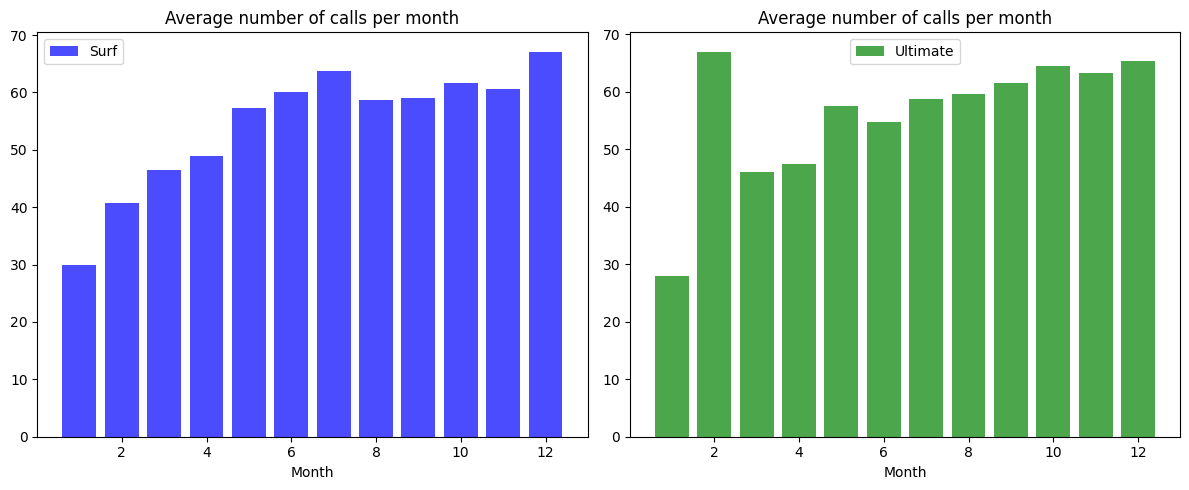

In [98]:
# Calling the function to compare the average call duration per month between 'Surf' and 'Ultimate' 
comparar_graf_barras(surf_avg_quantity, ultimate_avg_quantity, 'Surf', 'Ultimate','Average number of calls per month','Month')

We can observe that the number of calls is quite similar over the months for the Surf and Ultimate plans, but there is a notable difference in the month of February, where the Ultimate plan exceeds an average of 60 calls compared to the 40 of Surf.

In [101]:
# Compare the number of minutes that users of each plan require each month. Plot a histogram.

# Calculate the average call duration per month for each plan.
surf_avg_duration = surf_data.groupby('month')['cant_minutos'].mean()
ultimate_avg_duration = ultimate_data.groupby('month')['cant_minutos'].mean()


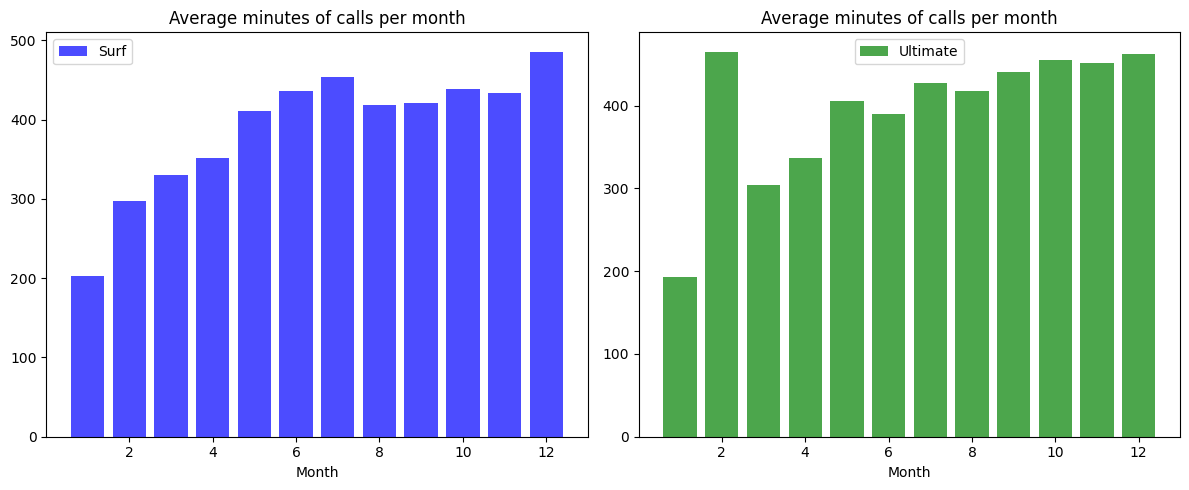

In [102]:
comparar_graf_barras(surf_avg_duration, ultimate_avg_duration, 'Surf', 'Ultimate','Average minutes of calls per month','Month')

We can observe that the minutes used in calls per month have a quite similar relationship with respect to the previous graph, where in February a clear difference can be seen for the Ultimate plan, with over 400 minutes, and in Surf it only reaches 300 minutes.

We proceed to calculate the mean and variance to see if the plans show different behaviours for their calls.

In [103]:
# Calculate the mean and variance of the monthly call duration. 
surf_avg_duration = surf_data.groupby('month')['cant_minutos'].mean()
ultimate_avg_duration = ultimate_data.groupby('month')['cant_minutos'].mean()

surf_var_duration = surf_data.groupby('month')['cant_minutos'].var()
ultimate_var_duration = ultimate_data.groupby('month')['cant_minutos'].var()

In [104]:
surf_avg_duration # average duration per month of the Surf plan

month
1.0     203.000000
2.0     297.000000
3.0     330.000000
4.0     351.540000
5.0     410.909091
6.0     435.793814
7.0     453.586777
8.0     418.185185
9.0     421.346734
10.0    438.124464
11.0    434.079710
12.0    485.697368
Name: cant_minutos, dtype: float64

In [105]:
ultimate_avg_duration # average duration per month of the Ultimate plan

month
1.0     193.500000
2.0     465.428571
3.0     304.250000
4.0     336.857143
5.0     406.241379
6.0     389.510638
7.0     427.067797
8.0     417.485714
9.0     440.367816
10.0    455.514286
11.0    451.290323
12.0    462.602740
Name: cant_minutos, dtype: float64

In [111]:
surf_var_duration #Variance of call duration per month for the Surf plan

month
1.0     15842.000000
2.0     52226.500000
3.0     35809.363636
4.0     50866.743265
5.0     55457.399522
6.0     43634.748711
7.0     59306.261157
8.0     51157.543133
9.0     42787.742805
10.0    48719.833580
11.0    48543.346350
12.0    59190.297551
Name: cant_minutos, dtype: float64

In [110]:
ultimate_var_duration #Variance of call duration per month for the Ultimate plan

month
1.0     16572.333333
2.0     45455.952381
3.0     61984.931818
4.0     34888.928571
5.0     43841.046798
6.0     36352.777058
7.0     72563.374635
8.0     53298.630228
9.0     56024.142208
10.0    52767.656044
11.0    60048.028849
12.0    59186.516958
Name: cant_minutos, dtype: float64

In [113]:
# Drawing a box plot to visualise the distribution of the monthly call duration.
def plot_boxplot(data1, data2, ylim=None, title=None):
    plt.figure(figsize=(16, 5))
    
    # Creating the first boxplot chart
    plt.subplot(1, 2, 1)
    plt.boxplot(data1)
    if ylim is not None:
        plt.ylim(ylim)
    if title is not None:
        plt.title(title[0])

    # Creating the second boxplot chart
    plt.subplot(1, 2, 2)
    plt.boxplot(data2)
    if ylim is not None:
        plt.ylim(ylim)
    if title is not None:
        plt.title(title[1])
        
    # We adjust the layout of the subplots
    plt.tight_layout()
    plt.show()

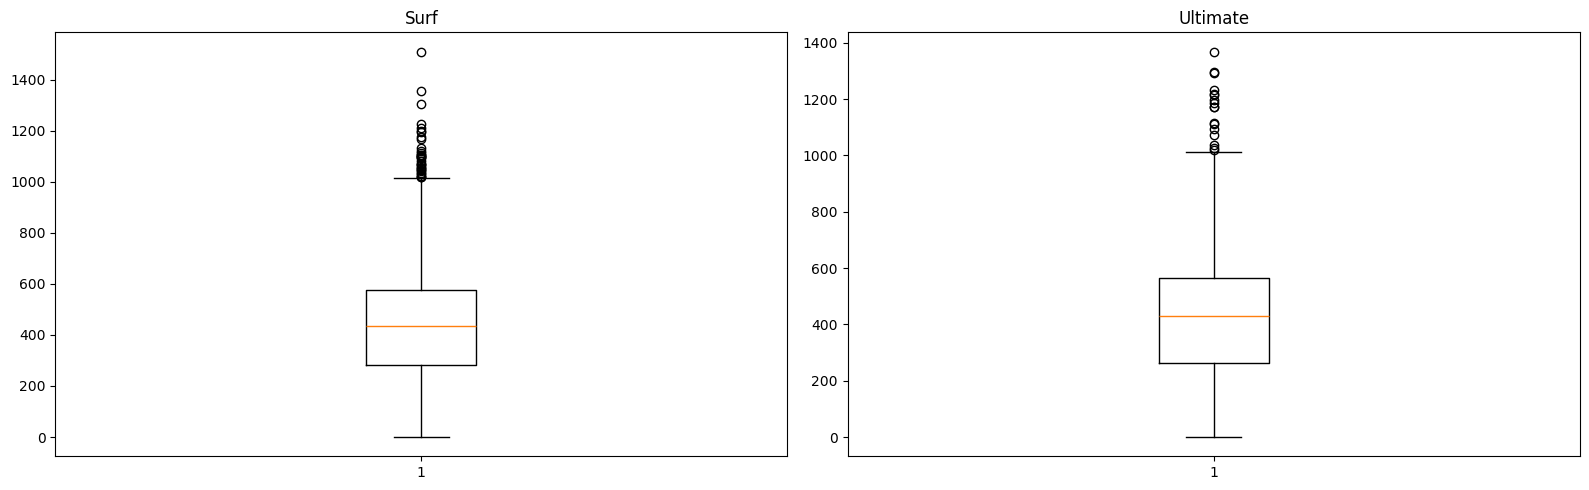

In [114]:
plot_boxplot(surf_data['cant_minutos'],ultimate_data['cant_minutos'], title=['Surf', 'Ultimate'])

We can conclude that for calls, there is a very slight preference for the use of the Ultimate plan regarding the number of minutes used, although with a slightly higher variance, that is, a greater dispersion of its data.

### Messages

In [115]:
# Compare the number of messages that users on each plan tend to send each month

# Calculate the average number of calls per month for each plan
surf_avg_quantity_SMS = surf_data.groupby('month')['num_mensajes'].mean()
ultimate_avg_quantity_SMS = ultimate_data.groupby('month')['num_mensajes'].mean()

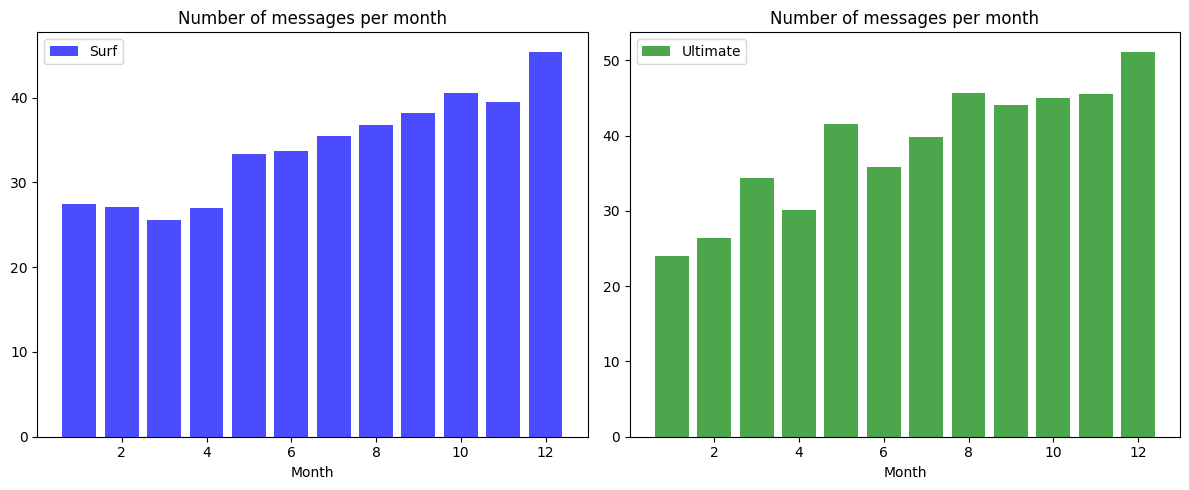

In [116]:
# Compare the amount of messages consumed by users per plan
comparar_graf_barras(surf_avg_quantity_SMS, ultimate_avg_quantity_SMS, 'Surf', 'Ultimate','Number of messages per month','Month')

With the previous graphs, we can observe that there is a more upward trend in SMS sending from the month of May onwards for the Ultimate plan, around over 40 messages. In the previous months, there is a more standard distribution but below 30 messages for the Surf plan.

In [117]:
# Calculate the mean and variance of the monthly message count
surf_avg_quantity_SMS = surf_data.groupby('month')['num_mensajes'].mean()
ultimate_avg_quantity_SMS = ultimate_data.groupby('month')['num_mensajes'].mean()

surf_var_quantity_SMS = surf_data.groupby('month')['num_mensajes'].var()
ultimate_var_quantity_SMS = ultimate_data.groupby('month')['num_mensajes'].var()

In [118]:
surf_avg_quantity_SMS

month
1.0     27.500000
2.0     27.111111
3.0     25.608696
4.0     26.920000
5.0     33.285714
6.0     33.711340
7.0     35.462810
8.0     36.753086
9.0     38.190955
10.0    40.540773
11.0    39.481884
12.0    45.414474
Name: num_mensajes, dtype: float64

In [119]:
ultimate_avg_quantity_SMS

month
1.0     24.000000
2.0     26.428571
3.0     34.416667
4.0     30.142857
5.0     41.482759
6.0     35.851064
7.0     39.745763
8.0     45.614286
9.0     44.091954
10.0    44.933333
11.0    45.516129
12.0    51.150685
Name: num_mensajes, dtype: float64

In [120]:
surf_var_quantity_SMS

month
1.0       84.500000
2.0      299.111111
3.0      272.249012
4.0      401.340408
5.0      628.312030
6.0      702.332474
7.0      681.700689
8.0      776.485239
9.0      720.044160
10.0    1007.266649
11.0     820.556034
12.0    1139.603222
Name: num_mensajes, dtype: float64

In [121]:
ultimate_var_quantity_SMS

month
1.0      251.333333
2.0      398.952381
3.0      334.992424
4.0      389.528571
5.0      912.758621
6.0      650.129510
7.0      689.123904
8.0      857.718634
9.0      740.782144
10.0     952.928205
11.0     919.455022
12.0    1213.866793
Name: num_mensajes, dtype: float64

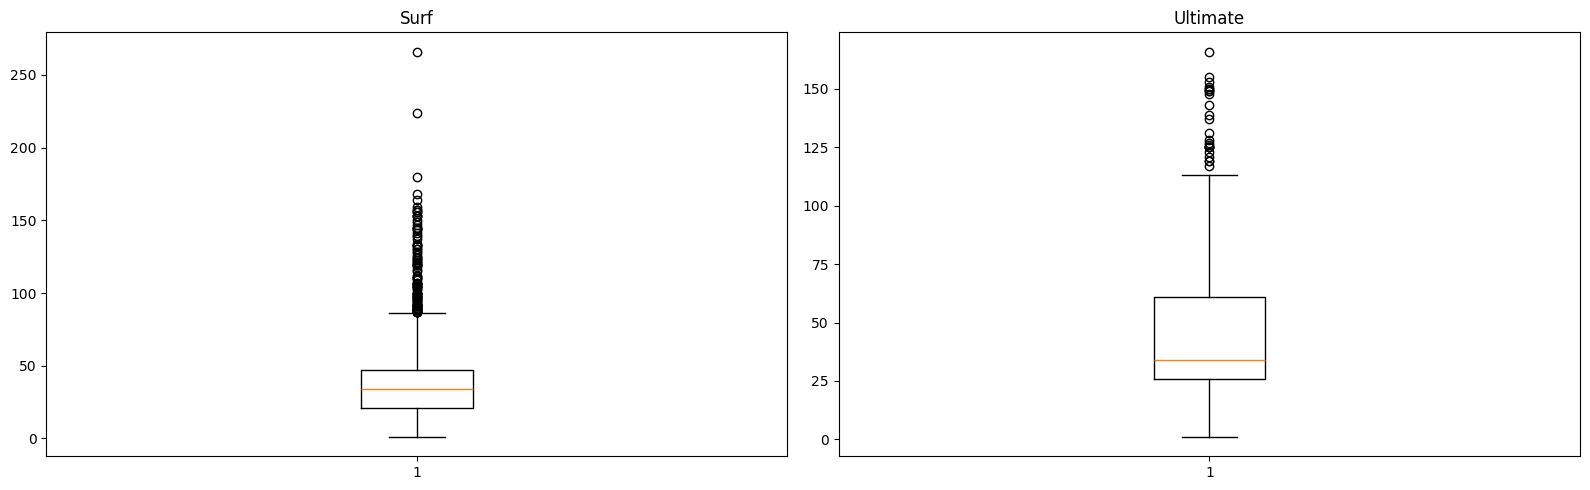

In [122]:
# Box plots for the number of messages of SURF and ULTIMATE
plot_boxplot(surf_data['num_mensajes'],ultimate_data['num_mensajes'], title=['Surf', 'Ultimate'])

Podemos concluir que para el envío de SMS, hay una leve preferencia por el uso del plan Ultimate respecto a la cantidad de SMS utilizados, aunque con una dispersión de los datos más alta y asimétrica que el del plan Surf.

### Internet

In [123]:
#amount of data volume used per month for each plan
surf_avg_vol_mb = surf_data.groupby('month')['vol_trafico_internet'].mean()
ultimate_avg_vol_mb = ultimate_data.groupby('month')['vol_trafico_internet'].mean()

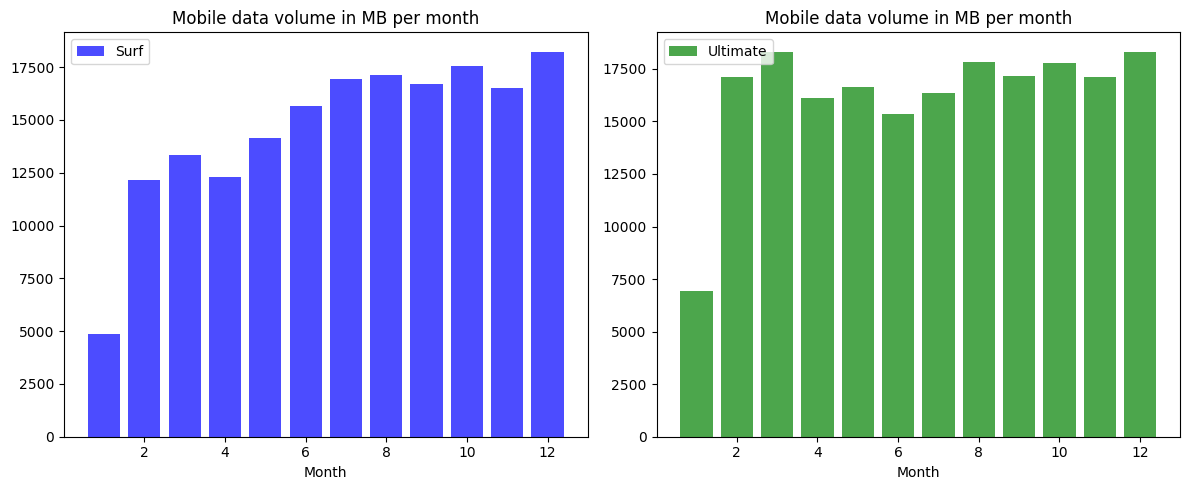

In [125]:
# Compare the average data volume (MB) consumed by users per plan
comparar_graf_barras(surf_avg_vol_mb, ultimate_avg_vol_mb, 'Surf', 'Ultimate','Mobile data volume in MB per month','Month')


We can conclude from the graph that there is a clear preference for the Ultimate plan since the amount of MB exceeds 15,000 during almost all months, except in January. Unlike the Surf plan, where it exceeds 15,000 MB only starting in June.

In [117]:
# Calcula la media y la varianza de la cantidad mensual de mensajes
surf_var_vol_mb = surf_data.groupby('month')['num_mensajes'].var()
ultimate_var_vol_mb = ultimate_data.groupby('month')['num_mensajes'].var()

In [118]:
surf_avg_vol_mb

month
1.0      4874.860000
2.0     12178.843333
3.0     13345.440000
4.0     12321.711200
5.0     14155.516104
6.0     15649.475773
7.0     16923.066777
8.0     17107.838951
9.0     16683.367487
10.0    17536.582146
11.0    16497.499457
12.0    18236.919342
Name: vol_trafico_internet, dtype: float64

In [119]:
ultimate_avg_vol_mb

month
1.0      6918.092500
2.0     17128.808571
3.0     18321.518333
4.0     16121.654762
5.0     16624.482414
6.0     15337.921064
7.0     16344.744407
8.0     17809.540714
9.0     17146.068966
10.0    17779.173429
11.0    17129.104435
12.0    18305.598288
Name: vol_trafico_internet, dtype: float64

In [120]:
surf_var_vol_mb 

month
1.0       84.500000
2.0      299.111111
3.0      272.249012
4.0      401.340408
5.0      628.312030
6.0      702.332474
7.0      681.700689
8.0      776.485239
9.0      720.044160
10.0    1007.266649
11.0     820.556034
12.0    1139.603222
Name: num_mensajes, dtype: float64

In [121]:
ultimate_var_vol_mb

month
1.0      251.333333
2.0      398.952381
3.0      334.992424
4.0      389.528571
5.0      912.758621
6.0      650.129510
7.0      689.123904
8.0      857.718634
9.0      740.782144
10.0     952.928205
11.0     919.455022
12.0    1213.866793
Name: num_mensajes, dtype: float64

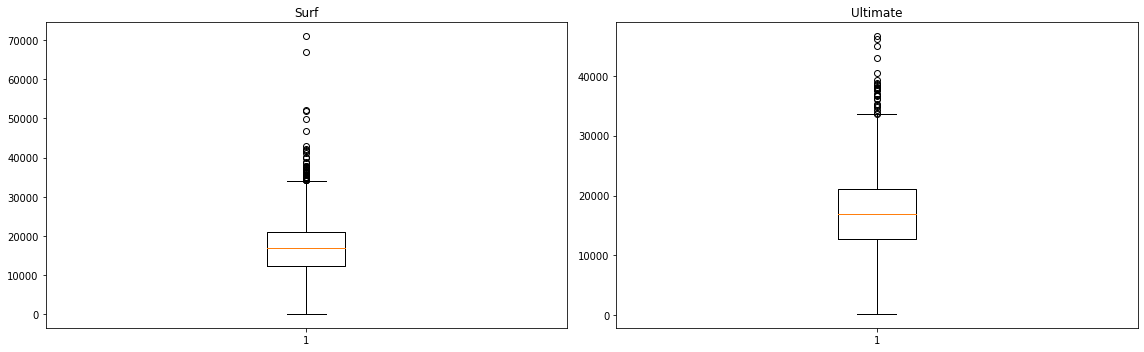

In [122]:
# Graficos de cajas para el volumen de datos (MB) usados de SURF y ULTIMATE
plot_boxplot(surf_data['vol_trafico_internet'],ultimate_data['vol_trafico_internet'], title=['Surf', 'Ultimate'])

Podemos corroborar por medio de la media que hay una preferencia clara por el uso de internet en el plan Ultimate, pero este a su vez tiene una dispersión de sus datos un poco más alta que en el plan Surf. Cabe señalar que el plan Surf tiene más datos atípicos en la muestra.

## Business Income

In [126]:
# Monthly income per month per use of each plan
surf_avg_income = surf_data.groupby('month')['ingresos_mensuales'].mean()
ultimate_avg_income = ultimate_data.groupby('month')['ingresos_mensuales'].mean()

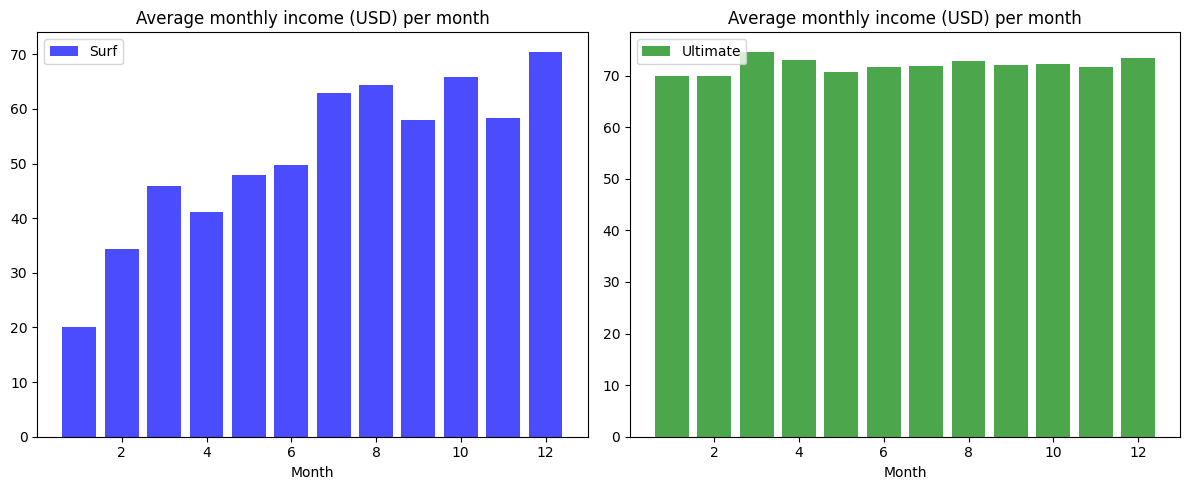

In [127]:
# Graph of average monthly revenues per user per plan
comparar_graf_barras(surf_avg_income, ultimate_avg_income, 'Surf', 'Ultimate','Average monthly income (USD) per month','Month')

We can observe through these graphs that the Ultimate plan has higher monthly revenues than the Surf plan throughout the year 2018, although it should be noted that the extra charge in Ultimate is minimal compared to the Surf plan (remember that the plan costs 70 and 20 USD respectively). In the Surf chart, it can be seen that there was an excess in service usage for all months except January.

In [128]:
# Calculate the mean and variance of the monthly message count
surf_var_income = surf_data.groupby('month')['ingresos_mensuales'].var()
ultimate_var_income = ultimate_data.groupby('month')['ingresos_mensuales'].var()

In [129]:
surf_avg_income

month
1.0     20.000000
2.0     34.396667
3.0     45.941304
4.0     41.110600
5.0     47.887922
6.0     49.688660
7.0     62.839339
8.0     64.301543
9.0     57.912915
10.0    65.828412
11.0    58.352210
12.0    70.494868
Name: ingresos_mensuales, dtype: float64

In [130]:
ultimate_avg_income

month
1.0     70.000000
2.0     70.000000
3.0     74.666667
4.0     73.000000
5.0     70.724138
6.0     71.638298
7.0     71.898305
8.0     72.900000
9.0     72.011494
10.0    72.333333
11.0    71.750000
12.0    73.404110
Name: ingresos_mensuales, dtype: float64

In [131]:
surf_var_income

month
1.0        0.000000
2.0      428.276100
3.0     1512.023512
4.0     1190.051789
5.0     1958.209501
6.0     1974.528651
7.0     2933.679511
8.0     3563.341094
9.0     2206.632684
10.0    3204.825867
11.0    2500.082747
12.0    4616.140144
Name: ingresos_mensuales, dtype: float64

In [132]:
ultimate_var_income

month
1.0       0.000000
2.0       0.000000
3.0     145.515152
4.0     120.400000
5.0      15.206897
6.0      75.018501
7.0     104.472238
8.0     156.931884
9.0      75.104518
10.0    171.185897
11.0     96.904472
12.0    219.814880
Name: ingresos_mensuales, dtype: float64

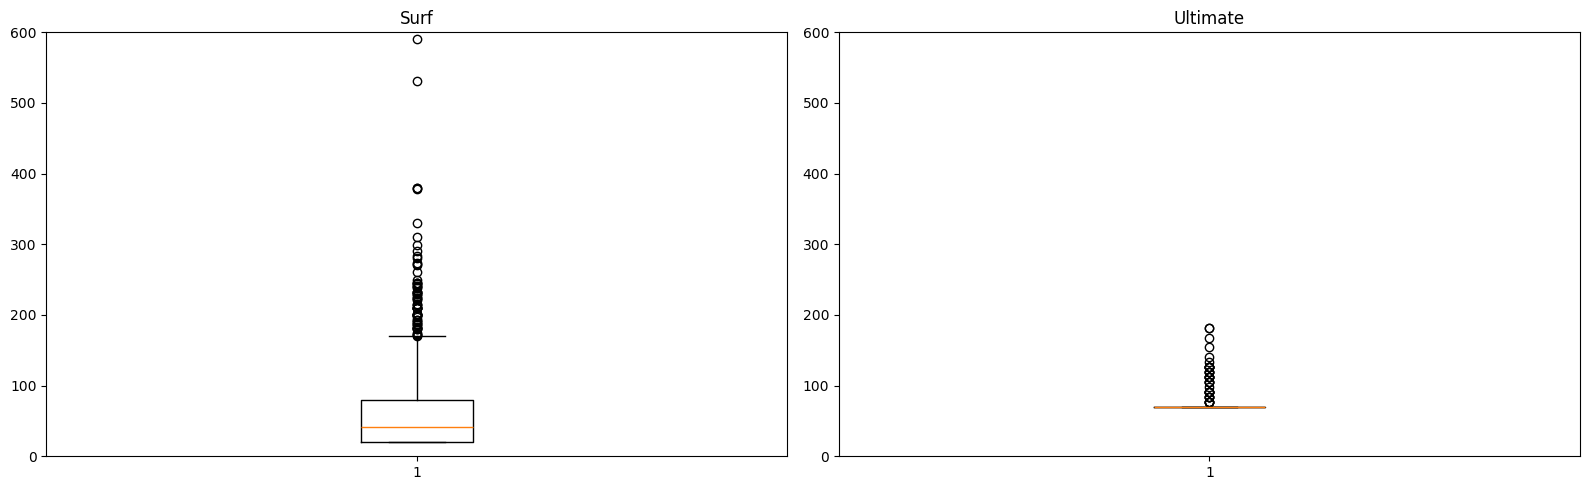

In [133]:
# Monthly revenue charts by usage of SURF and ULTIMATE
plot_boxplot(surf_data['ingresos_mensuales'],ultimate_data['ingresos_mensuales'], title=['Surf', 'Ultimate'],ylim=(0,600))

In [134]:
#Given the boxplot obtained in Ultimate, we check if it is correct.
ultimate_data['ingresos_mensuales'].describe() 

count    711.000000
mean      72.343179
std       11.464106
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: ingresos_mensuales, dtype: float64

With the boxplot, it becomes clearer that for the Ultimate plan, the data dispersion is much lower than for the Surf plan, meaning the company can collect more extra charges for the Surf plan than for the Ultimate plan, even though the Ultimate plan still generates the highest average income.

## 7. Testing statistical hypotheses <a id='hypotheses'></a>

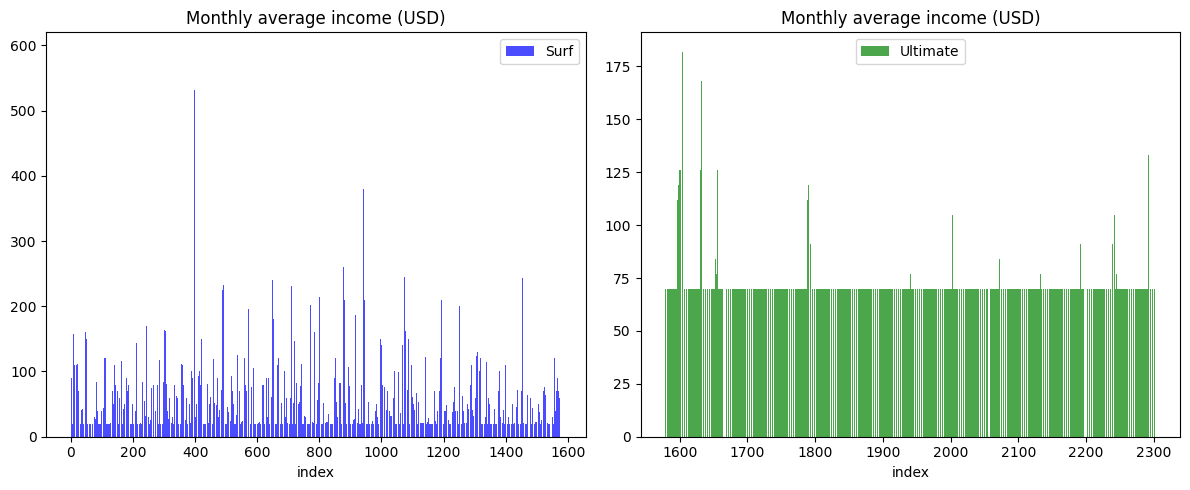

In [136]:
# We check if the income has an approximately normal distribution.
comparar_graf_barras(surf_data['ingresos_mensuales'], ultimate_data['ingresos_mensuales'], 'Surf', 'Ultimate','Monthly average income (USD)','index')


We can observe that they tend to follow a normal distribution; in any case, the sample data is >30 (large sample), so the t-test, which is the one we will use, is less sensitive to deviations from normality.

To test whether the average income of Surf and Ultimate users is different, we can use a hypothesis test. In this case, we can use a t-test for two independent samples, since we are comparing the means of two different groups.

First, we establish our hypotheses:

- Null hypothesis (H0): The average revenue of Surf plan users is equal to the average revenue of Ultimate plan users.
- Alternative hypothesis (H1): The average income of Surf plan users is different from the average income of Ultimate plan users.

In [142]:
# Test the hypotheses

# We use the two-sample t-test
results = st.ttest_ind(surf_data['ingresos_mensuales'], ultimate_data['ingresos_mensuales'])

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha: # compare the obtained p-values with the level of statistical significance:
    print("We reject the Null Hypothesis")
else:
    print("We do not reject the Null Hypothesis")

3.488851795150822e-08
We reject the Null Hypothesis


**CONCLUSION:**

Since the p-value is less than the alpha value of significance (0.05), the result is to reject the null hypothesis, i.e. we can statistically conclude that the average revenue of Surf users is different from that of Ultimate.

In [139]:
# Filter by Region (NY-NJ and other regions)
NY_NJ_data = merged_data_completed[merged_data_completed['regiones'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
otras_regiones_data = merged_data_completed[merged_data_completed['regiones'] == 'otras regiones']

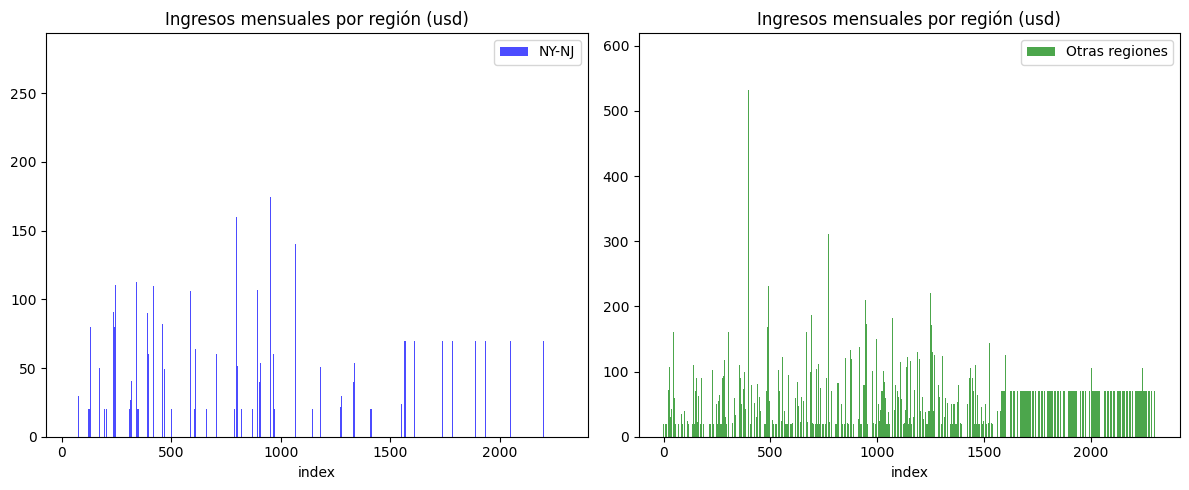

In [140]:
# We check whether income by city has an approximate normal distribution.
comparar_graf_barras(NY_NJ_data['ingresos_mensuales'], otras_regiones_data['ingresos_mensuales'], 'NY-NJ', 'Otras regiones','Ingresos mensuales por región (usd)','index')

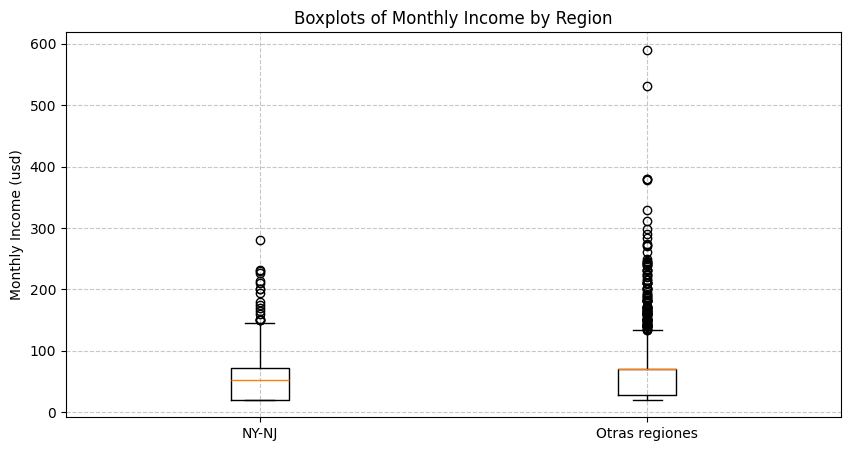

In [141]:
# Boxplot charts
plt.figure(figsize=(10, 5))
plt.boxplot([NY_NJ_data['ingresos_mensuales'],
              otras_regiones_data['ingresos_mensuales']],
             labels=['NY-NJ', 'Otras regiones'])
plt.title('Boxplots of Monthly Income by Region')
plt.ylabel('Monthly Income (usd)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

We can observe that they tend to follow a normal distribution given the symmetry in the median as seen in the boxplot graphs. Nevertheless, the sample data is >30 (large sample), so the t-test, which we will use, is less sensitive to deviations from normality.

To test whether the average income of the cities New York and New Jersey is different compared to the other cities, we can use a hypothesis test. In this case, we can use a t-test for two independent samples, since we are comparing the means of two different groups.

First, we set up our hypotheses:

- Null hypothesis (H0): The average income of users in NYC-NJ is equal to the average income of users in the other regions.
- Alternative hypothesis (H1): The average income of users in NYC-NJ is different from the average income of users in the other regions.

In [145]:
# Testing the hypoteses

# Using the t-test of 2 samples
resultado = st.ttest_ind(NY_NJ_data['ingresos_mensuales'], otras_regiones_data['ingresos_mensuales'])

alpha = 0.05

print(resultado.pvalue)

if results.pvalue < alpha: # compare the obtained p-values with the level of statistical significance:
    print("We reject the Null Hypothesis")
else:
    print("We do not reject the Null Hypothesis")

0.04305307606933257
We reject the Null Hypothesis


**CONCLUSION:**

Since the p-value is less than the alpha value of significance (0.05), the result is to reject the null hypothesis, i.e. we can statistically conclude that the average income of users in the cities of New York and New Jersey are different from the rest of the other cities.

## Final Conclusions  <a id='end'></a>

As a general conclusion we can highlight the following points in the order in which they were addressed:

- Step 1: We checked the databases for completeness.
- Step 2: We analysed if there were anomalies in each of the variables in order to correct them (either due to problems of text homologation, atypical data or data that did not make sense to the nature of the variable). We also verified that there were no duplicates. This was done for each of the tables
- Step 3: We checked for missing values for each variable and analysed whether there was any explanation for the absence of some values in each of these variables.
- Step 4: No missing values were identified in each of the tables, except in one, where this was supplemented by the creation of another ‘Boolean’ column.
- Step 5: The data types of some variables such as ‘datetime’ or ‘timedelta’ format were corrected.
- Step 6: New columns were created to facilitate the analysis of the project.
- Step 7: Once each table was validated, we proceeded to concatenate each of them through the key: user ID and month. With this we obtained a single table with information on calls, messages, MG volume used, users, plans used.
- Step 8: We supplemented the missing values generated by the unification of these tables by using the mean/median of each of the variables themselves since the percentage of missing values was very low.
- Step 9: We supplemented that table with the calculation of extra costs for over-usage of the plan for sending messages, use of minutes for calls and MB used. The monthly revenue was calculated which includes the value of the monthly plan.
- Step 10: We proceeded to analyse the behaviour of users in terms of calls, messages and internet used per month and per type of plan, by means of bar graphs, mean and variance. The same was done for monthly revenue.
- Step 11: Two statistical tests were conducted for 2 types of samples to statistically confirm the following: 
    - The average revenues of users in the cities of New York and New Jersey are different from the rest of the other cities with a significance level assumption of 5%.
    - Average revenues are different for both plans with a 5% significance level assumption.
    
Note: This is under the assumption that they have a trend normal distribution and samples larger than 30 data.

It can finally be concluded that the Ultimate plan generates higher revenues for the company than the Surf plan, although users exceed the limit of services provided by Surf, generating significant profits from extra charges, and there is also a clear preference for internet use among Ultimate users over Surf.